# HW 4 Instructions

Please submit your answers as 2 files uploaded to Courseworks: a Jupyter Notebook (.ipynb) file & a pdf export. Please double check that all pages exported properly, sometimes they get cut off! In answering each of the following questions please include (a) the question as a markdown header in your Jupyter notebook, (b) the raw code that you used to generate any results, tables, or figures, and (c) the top ten or fewer rows of the dataframe (do not include more than ten rows for any table in your report). Include any plots or figures generated from your code as well.

## Part A: Build a classification model using text data

For Part A, you will be solving a text classification task. The training data is stored in the Homework 4 Data folder. The data consists of headlines that have been labeled for whether they are clickbait.


In [6]:
# load libraries
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

#### 1. Import the data. The headlines will become your vectorized X matrix, and the labels indicate a binary classification (clickbait or not).

In [ ]:
# Import library
import pandas as pd

# Load the dataset
data = pd.read_csv("text_training_data.csv")

# Encode labels as binary values: 1 for clickbait, 0 for not clickbait
data['label'] = data['label'].map({'clickbait': 1, 'not clickbait': 0})

# Split the data into feature and target variables
X = data['headline']  # Feature matrix: the headlines
y = data['label']     # Target labels: binary classification (clickbait or not)

# Check the first few rows
display(data.head())
# Check if the number of value is correct. Total data entries should be 24,979 as shown in csv file.
print("\nClass distribution:")
print(data['label'].value_counts()) 

,headline,label
0,MyBook Disk Drive Handles Lots of Easy Backups,0
1,CIT Posts Eighth Loss in a Row,0
2,"Candy Carson Singing The ""National Anthem"" Is ...",1
3,Why You Need To Stop What You're Doing And Dat...,1
4,27 Times Adele Proved She's Actually The Reale...,1



Class distribution:
label
0    12778
1    12201
Name: count, dtype: int64


#### 2. Convert the headline data into an X feature matrix using a simple bag of words approach.

In [ ]:
# Import library
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer
count = CountVectorizer()

# Transform the text data into a bag-of-words feature matrix
X_matrix = count.fit_transform(X)

# Check the resulting feature matrix shape
print("Shape of the feature matrix (X):", X_matrix.shape)

# Display a few feature names
print("\nSample feature names:")
print(count.get_feature_names_out()[:10])  # Display first 10 feature names


Shape of the feature matrix (X): (24979, 20332)

Sample feature names:
['00' '000' '000th' '00s' '01' '04' '05' '08' '08m' '09']


#### 3. Run logistic regression to predict clickbait headlines. Remember to train_test_split your data and use GridSearchCV to find the best value of C. You should evaluate your data with F1 scoring.

Side-note: 

I add stratify=y while spliting the dataset.

Why stratify=y is Needed
* Preserves Class Balance: If the dataset is imbalanced (e.g., 80% "not clickbait" and 20% "clickbait"), a random split might result in one set having significantly fewer samples from the minority class.
stratify=y ensures that both the training and testing sets maintain the same 80%-20% ratio.
* Reliable Metrics: Performance metrics (like F1 score) can be skewed if the test set class proportions differ from the original dataset.

Side Note:

Fun fact - print("F1 Score on the test set:", f1_score(y_test, y_pred)). This code by default gives me the F1-score for the positive class only, not the weighted average across all classes. So you can see the f1-score is the same as the Clickbait f1-score shown in classification report.

If want weighted f1-score, try code:

f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("Weighted F1 Score on the test set:", f1_weighted)

In [32]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

print("Model 1: Simple Logistic Regression")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y, test_size=0.2, random_state=42, stratify=y)

# Initialize a Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Set up hyperparameter tuning for 'C' (regularization strength)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(lr, param_grid, scoring='f1', cv=3) # I choose cv=3 instead of a common 5 since the dataset is larger enough to provide diverse training/testing subsets

# Fit the model to the training data
grid_lr.fit(X_train, y_train)

# Evaluate the model on the test set
best_lr = grid_lr.best_estimator_  # Get the best logistic regression model
y_pred = best_lr.predict(X_test)

# Display the results
print("\nBest parameter (C):", grid_lr.best_params_['C'])
print("F1 Score on the test set:", f1_score(y_test, y_pred)) 

# Add a classification report just for fun
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Clickbait', 'Clickbait'], digits=4))


Model 1: Simple Logistic Regression

Best parameter (C): 10
F1 Score on the test set: 0.9662176165803109

Classification Report:
               precision    recall  f1-score   support

Not Clickbait     0.9583    0.9789    0.9685      2556
    Clickbait     0.9774    0.9553    0.9662      2440

     accuracy                         0.9674      4996
    macro avg     0.9678    0.9671    0.9673      4996
 weighted avg     0.9676    0.9674    0.9674      4996



#### 4. Run 2 more logistic regression models by changing the vectorization approach (e.g., using n-grams, stop_words, and other techniques we discussed). In both cases, keep your logistic regression step the same. Only change how you're generating the X matrix from the text data.

Vectorization Approach 1: Stop-words

In [29]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer

# ================
# Vectorization 1: Stop-Words
# ================
print("Model 2: Stop-Words Removal")

# Initialize CountVectorizer with stop-words removal
count_stopwords = CountVectorizer(stop_words='english')  # Removes common English stop-words
X_matrix_stopwords = count_stopwords.fit_transform(X)

# Split the dataset
X_train_stopwords, X_test_stopwords, y_train, y_test = train_test_split(X_matrix_stopwords, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate the model
grid_lr_stopwords = GridSearchCV(lr, param_grid, scoring='f1', cv=3)
grid_lr_stopwords.fit(X_train_stopwords, y_train)
best_lr_stopwords = grid_lr_stopwords.best_estimator_
y_pred_stopwords = best_lr_stopwords.predict(X_test_stopwords)

# Display results
print("\nBest parameter (C):", grid_lr_stopwords.best_params_['C'])
print("F1 Score on the test set:", f1_score(y_test, y_pred_stopwords))
print("\nClassification Report (Stop-Words):")
print(classification_report(y_test, y_pred_stopwords, target_names=['Not Clickbait', 'Clickbait'], digits=4))


Model 2: Stop-Words Removal

Best parameter (C): 10
F1 Score on the test set: 0.9497528830313015

Classification Report (Stop-Words):
               precision    recall  f1-score   support

Not Clickbait     0.9481    0.9570    0.9525      2556
    Clickbait     0.9545    0.9451    0.9498      2440

     accuracy                         0.9512      4996
    macro avg     0.9513    0.9510    0.9511      4996
 weighted avg     0.9512    0.9512    0.9512      4996



Vectorization Approach 2: TF-IDF

In [ ]:
# Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# ================
# Vectorization 2: TF-IDF
# ================
print("Model 3: TF-IDF Vectorization")

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()
X_matrix_tfidf = tfidf.fit_transform(X)

# Split the dataset
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_matrix_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate the model
grid_lr_tfidf = GridSearchCV(lr, param_grid, scoring='f1', cv=3)
grid_lr_tfidf.fit(X_train_tfidf, y_train)
best_lr_tfidf = grid_lr_tfidf.best_estimator_
y_pred_tfidf = best_lr_tfidf.predict(X_test_tfidf)

# Display results
print("\nBest parameter (C):", grid_lr_tfidf.best_params_['C'])
print("F1 Score on the test set:", f1_score(y_test, y_pred_tfidf))
print("\nClassification Report (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf, target_names=['Not Clickbait', 'Clickbait'], digits=4))

Model 3: TF-IDF Vectorization

Best parameter (C): 100
F1 Score on the test set: 0.9689312344656172

Classification Report (TF-IDF):
               precision    recall  f1-score   support

Not Clickbait     0.9613    0.9808    0.9710      2556
    Clickbait     0.9795    0.9586    0.9689      2440

     accuracy                         0.9700      4996
    macro avg     0.9704    0.9697    0.9699      4996
 weighted avg     0.9702    0.9700    0.9700      4996



#### 5. Which of your 3 models performed best? What are the most significant coefficients in each, and how do they compare?

#### a) Which is the best?

Examine each model

---

Model 1 (Simple Logistic Regression):

* Weighted F1 Score: 0.9674
* This model uses a basic bag-of-words approach (CountVectorizer without additional modifications).
* Performed well overall but slightly less than Model 3.

Model 2 (Stop-Words Removal):

* Weighted F1 Score: 0.9512
* Removing stop-words reduced performance compared to Model 1. This suggests that some stop-words might still carry useful information for distinguishing "Clickbait" from "Not Clickbait."

Model 3 (TF-IDF Vectorization):

* Weighted F1 Score: 0.9700
* This model performed the best overall.
* TF-IDF effectively downweights common but uninformative words while emphasizing rare, significant terms, leading to better feature representation for classificatio
---

Why Did Model 3 Perform Best?
* TF-IDF captures the relative importance of words across all headlines, ensuring that rare but meaningful words contribute more to the model's predictions.
* Unlike stop-word removal, TF-IDF doesn't entirely exclude common words; it just reduces their weight based on their overall document frequency.

#### b) What are the most significant coefficients in each, and how do they compare?

In [33]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Helper function to plot top positive and negative coefficients
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """
    Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        Number of largest (most positive) and smallest (most negative)
        coefficients to show.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        raise ValueError(f"Coefficients must be 1d array, got shape {coefficients.shape}")
    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients does not match number of feature names.")
    
    # Get indices of top positive and negative coefficients
    positive_coefficients = np.argsort(coefficients)[-n_top_features:]
    negative_coefficients = np.argsort(coefficients)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])

    # Plot the coefficients
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coefficients[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coefficients[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60, ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")
    plt.title("Top Positive and Negative Coefficients")
    plt.show()


Model 1: Simple Logistic Regression


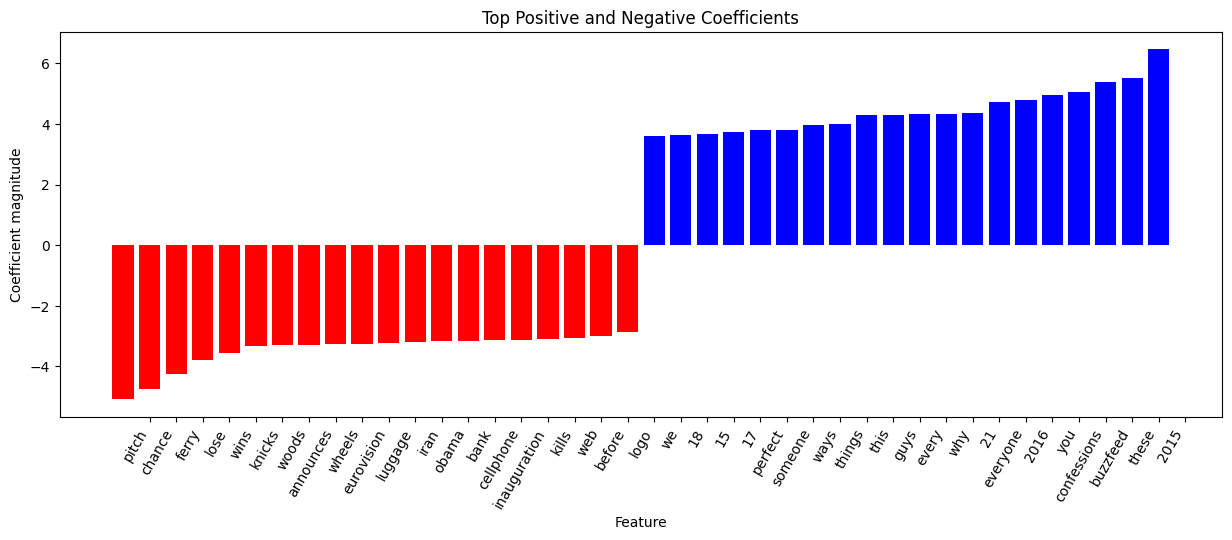

In [34]:
# Plot coefficients for Model 1 (Simple Logistic Regression)
print("Model 1: Simple Logistic Regression")
coefs_model_1 = best_lr.coef_
feature_names_model_1 = count.get_feature_names_out()
visualize_coefficients(coefs_model_1, feature_names_model_1, n_top_features=20)

Model 2: Stop-Words Removal


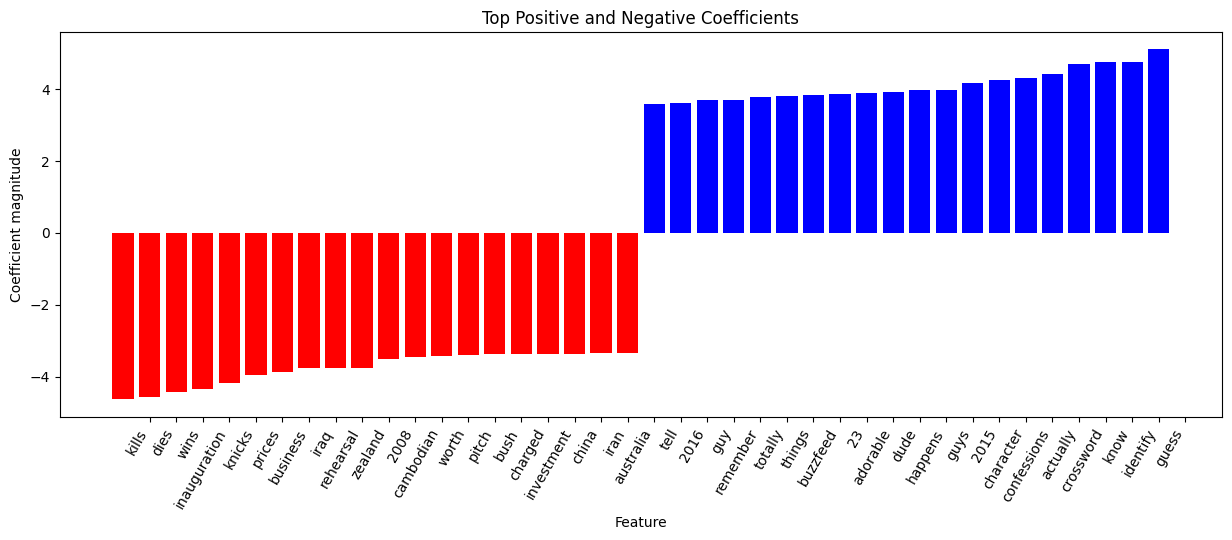

In [35]:
# Plot coefficients for Model 2 (Stop-Words Removal)
print("Model 2: Stop-Words Removal")
coefs_model_2 = best_lr_stopwords.coef_
feature_names_model_2 = count_stopwords.get_feature_names_out()
visualize_coefficients(coefs_model_2, feature_names_model_2, n_top_features=20)

Model 3: TF-IDF Vectorization


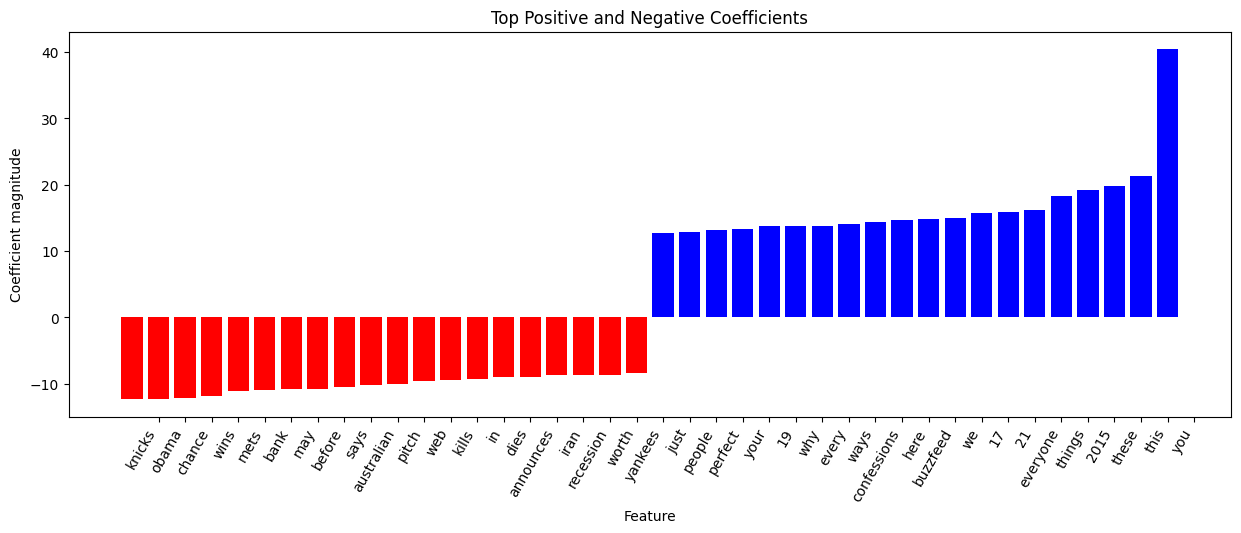

In [36]:
# Plot coefficients for Model 3 (TF-IDF Vectorization)
print("Model 3: TF-IDF Vectorization")
coefs_model_3 = best_lr_tfidf.coef_
feature_names_model_3 = tfidf.get_feature_names_out()
visualize_coefficients(coefs_model_3, feature_names_model_3, n_top_features=20)

Also another interesting way without using the graph

In [39]:
# Function to print top positive and negative coefficients
def print_top_coefficients(model, vectorizer, n_top_features=10):
    """
    Prints the top positive and negative coefficients for a given logistic regression model.
    
    Parameters:
        model : Trained logistic regression model
        vectorizer : Fitted vectorizer (CountVectorizer or TfidfVectorizer)
        n_top_features : Number of top positive and negative coefficients to display
    """
    coef = model.coef_[0]  # Extract coefficients for binary classification
    feature_names = vectorizer.get_feature_names_out()  # Get feature names
    
    # Combine feature names with their coefficients and sort by magnitude
    coefficients = sorted(zip(feature_names, coef), key=lambda x: x[1], reverse=True)
    
    # Print top positive coefficients
    print("Top 10 Positive Coefficients:")
    for feature, coef_value in coefficients[:n_top_features]:
        print(f"{feature}: {coef_value:.4f}")
    
    # Print top negative coefficients
    print("\nTop 10 Negative Coefficients:")
    for feature, coef_value in coefficients[-n_top_features:]:
        print(f"{feature}: {coef_value:.4f}")

# Model 1: Simple Logistic Regression
print("Model 1: Simple Logistic Regression\n")
print_top_coefficients(best_lr, count, n_top_features=10)

# Model 2: Stop-Words Removal
print("\nModel 2: Stop-Words Removal\n")
print_top_coefficients(best_lr_stopwords, count_stopwords, n_top_features=10)

# Model 3: TF-IDF Vectorization
print("\nModel 3: TF-IDF Vectorization\n")
print_top_coefficients(best_lr_tfidf, tfidf, n_top_features=10)



Model 1: Simple Logistic Regression

Top 10 Positive Coefficients:
2015: 6.4559
these: 5.5291
buzzfeed: 5.3875
confessions: 5.0465
you: 4.9491
2016: 4.7919
everyone: 4.7289
21: 4.3706
why: 4.3384
every: 4.3381

Top 10 Negative Coefficients:
eurovision: -3.2486
wheels: -3.2492
announces: -3.2802
woods: -3.2876
knicks: -3.3194
wins: -3.5531
lose: -3.7889
ferry: -4.2457
chance: -4.7391
pitch: -5.0938

Model 2: Stop-Words Removal

Top 10 Positive Coefficients:
guess: 5.0903
identify: 4.7382
know: 4.7291
crossword: 4.6945
actually: 4.4101
confessions: 4.3029
character: 4.2552
2015: 4.1619
guys: 3.9639
happens: 3.9548

Top 10 Negative Coefficients:
zealand: -3.7562
rehearsal: -3.7694
iraq: -3.7728
business: -3.8807
prices: -3.9702
knicks: -4.1748
inauguration: -4.3562
wins: -4.4313
dies: -4.5699
kills: -4.6374

Model 3: TF-IDF Vectorization

Top 10 Positive Coefficients:
you: 40.4420
this: 21.2656
these: 19.8828
2015: 19.2794
things: 18.2365
everyone: 16.1511
21: 15.9314
17: 15.7993
we: 14.9

**Comparison Across Models**

---

**Positive Coefficients (Clickbait Predictors):**
- Model 1:
  - Includes conversational (`you`, `your`), emotional (`confessions`), and trendy words (`buzzfeed`, `2015`).
- Model 2:
  - Highlights impactful, action-oriented words (`guess`, `identify`, `happens`) while losing conversational terms due to stop-word removal.
- Model 3:
  - Amplifies rare but meaningful words (`you`, `this`, `things`), capturing clickbait-specific phrasing more effectively.

**Negative Coefficients (Not Clickbait Predictors):**
- Model 1:
  - Includes news-related (`wins`, `eurovision`) and topic-specific (`ferry`, `pitch`) terms.
- Model 2:
  - Highlights factual or serious news words (`iraq`, `business`, `dies`) while removing generic terms due to stop-word removal.
- Model 3:
  - Strongly weights distinctive terms in non-clickbait (`obama`, `bank`, `mets`) that define specific factual reporting.

---

**Conclusion**

- Model 1 (Simple Logistic Regression):
  - Balances conversational terms for "Clickbait" and factual terms for "Not Clickbait."
  - Includes common, high-frequency terms, which sometimes dilute feature impact.

- Model 2 (Stop-Words Removal):
  - Focuses more on impactful and topic-specific words due to stop-word removal.
  - Still, some meaningful conversational terms are lost.

- Model 3 (TF-IDF Vectorization):
  - Produces the most refined feature weights.
  - Strongly emphasizes rare, distinctive words while reducing the influence of common, high-frequency terms.

**Best Model for Interpretability and Performance**:
- **Model 3 (TF-IDF)** achieves the most effective feature weighting, enabling it to focus on rare, clickbait-specific terms and reduce noise from frequently occurring neutral words. This aligns with its superior F1 score.


---
## END of Part A
---

## Part B: Build a Predictive Neural Network Using Keras

In Part B, you will run a multilayer perceptron on the iris dataset to predict flower type.

### 1. Load the data. Data can be imported directly using pd.read_csv() and the link [Iris Dataset CSV](http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv).

In [63]:
# Import library
import pandas as pd

# Load the Iris dataset from the provided link
url = "http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv"
iris_data = pd.read_csv(url)

# Inspect the first few rows of the dataset
print("First few rows of the Iris dataset:")
display(iris_data.head())

# Check the structure of the dataset
print("\nDataset Information:")
iris_data.info()

# Check for missing values
print("\nMissing Values in the Dataset:")
print(iris_data.isnull().sum())


First few rows of the Iris dataset:


,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rownames      150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Missing Values in the Dataset:
rownames        0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


### 2. Using the Sequential interface in Keras, build a model with 2 hidden layers with 16 neurons each. Compile and fit the model. Assess its performance using accuracy on data that has been train_test_split.

In [65]:
# Identify X as features and Y as label
df2 = iris_data.iloc[:,1:] # Remove column "rownames" since it is useless for our model
X = df2.loc[:, df2.columns != 'Species'] # Features
y = df2['Species'] # Label

# Check the info
display(X)
display(y)
display(pd.get_dummies(y))  # convert the categorical column y into a one-hot encoded format, to represent categorical labels as numerical arrays

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


Side-note:

The Iris dataset is a multi-class problem, as it involves classifying data points into one of three species (setosa, versicolor, virginica).

So I can use either use one-hot encoding with `categorical_crossentropy` or integer labels with `sparse_categorical_crossentropy`

- **Integer labels**:
    - I can easily integer-encode the labels using LabelEncoder for sparse_categorical_crossentropy.

- **One-hot encoding**:
    - I can convert the labels to one-hot encoded form using pd.get_dummies or keras.utils.to_categorical for categorical_crossentropy.


I will use one-hot encoding for the rest of the part B, but let's see what the `sparse_categorical_crossentropy` is like:

In [66]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score


# Encode the labels into numerical format
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Converts labels like 'setosa' to integers (e.g., 0, 1, 2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Sequential model with Keras
model = Sequential([
    Dense(16, input_shape=(X.shape[1],), activation='relu'),  # First hidden layer with 16 neurons
    Dense(16, activation='relu'),  # Second hidden layer with 16 neurons
    Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes (setosa, versicolor, virginica)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', # Chose sparse_categorical_crossentropy as the loss function because the labels are integers.
              metrics=['accuracy'])

# Train (fit) the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)  # Use verbose=1 to see training progress

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Get the class predictions
accuracy = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f"Accuracy on the test set: {accuracy:.4f}")

Epoch 1/50


C:\Users\10499\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.3370 - loss: 1.5022
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3848 - loss: 1.1957
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6884 - loss: 1.0092
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.6402 - loss: 0.9944
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - loss: 0.9330  
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.6398 - loss: 0.9249
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6869 - loss: 0.8927
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.7410 - loss: 0.8361
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.6726 - loss: 0.8289
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.6828 - loss: 0.7719
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8128 - loss: 0.7183
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8234

Then the regular `one-hot encoding` taught by professor:

In [78]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import Input # Add this so there will not be Userwarning: "Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.super().__init__(activity_regularizer=activity_regularizer, **kwargs)"

# Need to redefine the X and y since they have been trasnformed in the above model method.
# Identify X as features and Y as label
df2 = iris_data.iloc[:,1:] # Remove column "rownames" since it is useless for our model
X = df2.loc[:, df2.columns != 'Species'] # Features
y = df2['Species'] # Label

# Map categorical labels to integers
label_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y = np.array([label_mapping[label] for label in y])

# One-hot encode the y data
y = to_categorical(y, num_classes=3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Sequential model with an Input layer
model = Sequential()
model.add(Input(shape=(X.shape[1],)))  # Define the input shape explicitly to avoid Userwarning
model.add(Dense(16, activation='relu'))     # First hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))     # Second hidden layer with 16 neurons
model.add(Dense(3, activation='softmax'))   # Output layer (3 classes)


# Optimize using SGD with a learning rate
sgd = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', # SGD works well with small data set and better avoids overfitting
              optimizer=sgd, 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, # 50 is a reasonable size of small data, and 10 or 20 might result in underfitting
                    batch_size=16, verbose=1) # The training set is small, so a batch size of 16 ensures the model performs enough updates per epoch while still being efficient

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=16)

# Print the loss and accuracy
print("\nModel 1: 2 hidden layers with 16 neurons in each\n")
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2596 - loss: 1.1804
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3003 - loss: 1.0522  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5179 - loss: 0.9958
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5548 - loss: 0.9580
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6613 - loss: 0.9024
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7389 - loss: 0.8936
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7496 - loss: 0.8452
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7599 - loss: 0.8080
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8898 - loss: 0.7755
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6682 - loss: 0.7568  
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7260 - loss: 0.6968  
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8364 - loss: 0.6815  
Epoch

### 3. Run 2 additional models using different numbers of hidden layers and/or hidden neurons.

Model 2: More Hidden Layers

In [72]:
# ================
# Model 2: More Hidden Layers (3 hidden layers the same 16 neurons in each)
# ================

model_2 = Sequential()
model_2.add(Input(shape=(X.shape[1],)))  # Input layer
model_2.add(Dense(16, activation='relu'))  # First hidden layer
model_2.add(Dense(16, activation='relu'))  # Second hidden layer
model_2.add(Dense(16, activation='relu'))  # Third hidden layer
model_2.add(Dense(3, activation='softmax'))  # Output layer (3 classes)

# Compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.01),
                metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate the model
score_2 = model_2.evaluate(X_test, y_test, batch_size=16)
print("\nModel 2: 3 hidden layers with 16 neurons in each\n")
print(f"Model 2 - Test Loss: {score_2[0]:.4f}")
print(f"Model 2 - Test Accuracy: {score_2[1]:.4f}")


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0917 - loss: 1.2960 
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3565 - loss: 1.0990
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4128 - loss: 1.0682  
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3214 - loss: 1.0503 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3804 - loss: 1.0424
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4233 - loss: 1.0311  
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3144 - loss: 1.0257
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4598 - loss: 1.0136
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6201 - loss: 1.0036
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6128 - loss: 0.9759  
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7839 - loss: 0.9614  
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6698 - loss: 0.9490
Epo

Model 3: Fewer Hidden Neurons

In [79]:
# ================
# Model 3: Fewer Hidden Neurons (2 hidden layers with 64 and 32 neurons respectively)
# ================
model_3 = Sequential()
model_3.add(Input(shape=(X.shape[1],)))  # Input layer
model_3.add(Dense(64, activation='relu'))  # First hidden layer
model_3.add(Dense(32, activation='relu'))  # Second hidden layer
model_3.add(Dense(3, activation='softmax'))  # Output layer (3 classes)

# Compile the model
model_3.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.01),
                metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate the model
score_3 = model_3.evaluate(X_test, y_test, batch_size=16)
print("\nModel 3: 2 hidden layers with 64 and 32 neurons respectively\n")
print(f"Model 3 - Test Loss: {score_3[0]:.4f}")
print(f"Model 3 - Test Accuracy: {score_3[1]:.4f}")

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3979 - loss: 0.9792
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3751 - loss: 0.8987  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5674 - loss: 0.8964  
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6585 - loss: 0.8425  
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6880 - loss: 0.8395
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - loss: 0.8150
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6531 - loss: 0.7896  
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.6586 - loss: 0.7501
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7142 - loss: 0.7135
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.7076  
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - loss: 0.6824  
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7136 - loss: 0.67

### 4. How does the performance compare between your 3 models?

### Model Summaries

---

#### Model 1: Baseline Model
- Format: 2 hidden layers with 16 neurons each.
- Test Loss: 0.2853
- Test Accuracy: 0.9667
- Observation:
  - Achieved the highest accuracy among the three models.
  - Its small architecture is well-suited for the Iris dataset, which is simple and has a small number of features.

#### Model 2: Increased Depth
- Format: 3 hidden layers with 16 neurons each.
- Test Loss: 0.3188
- Test Accuracy: 0.8333
- Observation:
  - Adding an extra hidden layer increased the model's complexity but degraded performance.
  - Likely overfitting or struggling with optimization due to unnecessary complexity for the given dataset.

#### Model 3: Increased Neurons
- Format: 2 hidden layers with 64 and 32 neurons, respectively.
- Test Loss: 0.3188
- Test Accuracy: 0.8333
- Observation:
  - Increasing the number of neurons added significant capacity, but it did not improve the performance.
  - The larger number of neurons may have caused overfitting on the training data, leading to poor generalization.


---

### Graph for better visualization

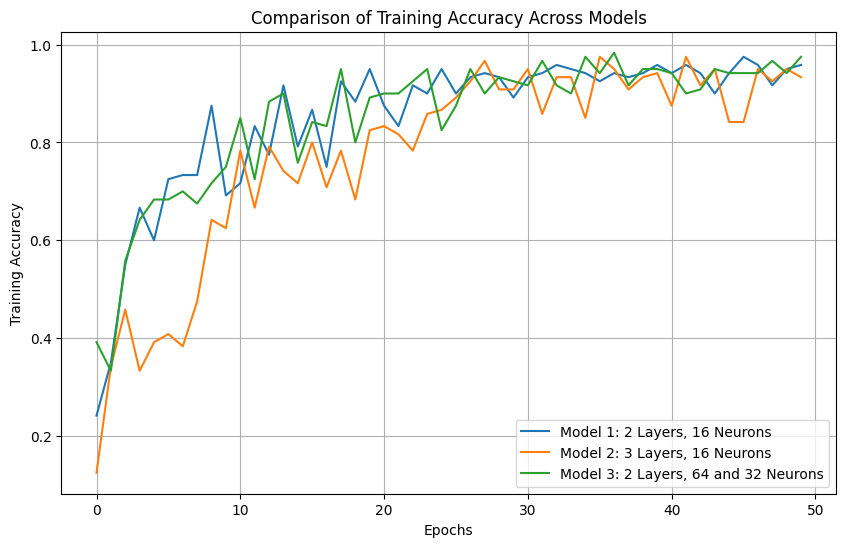

In [80]:
import matplotlib.pyplot as plt

# Plot the validation accuracy for all three models
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Model 1: 2 Layers, 16 Neurons')  # Model 1 history
plt.plot(history_2.history['accuracy'], label='Model 2: 3 Layers, 16 Neurons')  # Model 2 history
plt.plot(history_3.history['accuracy'], label='Model 3: 2 Layers, 64 and 32 Neurons')  # Model 3 history

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.title('Comparison of Training Accuracy Across Models')
plt.grid(True)
plt.show()